In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Embedding, Bidirectional, LSTM, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [3]:
# Set random seeds for reproducibility
np.random.seed(42)
tf.random.set_seed(42)


In [5]:
# Load dataset
df = pd.read_csv('indian_languages.csv')

In [6]:
# Data Preprocessing
def preprocess_text(text):
    # Basic cleaning
    text = text.strip()
    # Remove special characters and numbers
    text = ''.join([c for c in text if c.isalpha() or c.isspace()])
    # Convert to lowercase
    text = text.lower()
    # Add more language-specific preprocessing as needed
    return text

df['cleaned_text'] = df['text'].apply(preprocess_text)

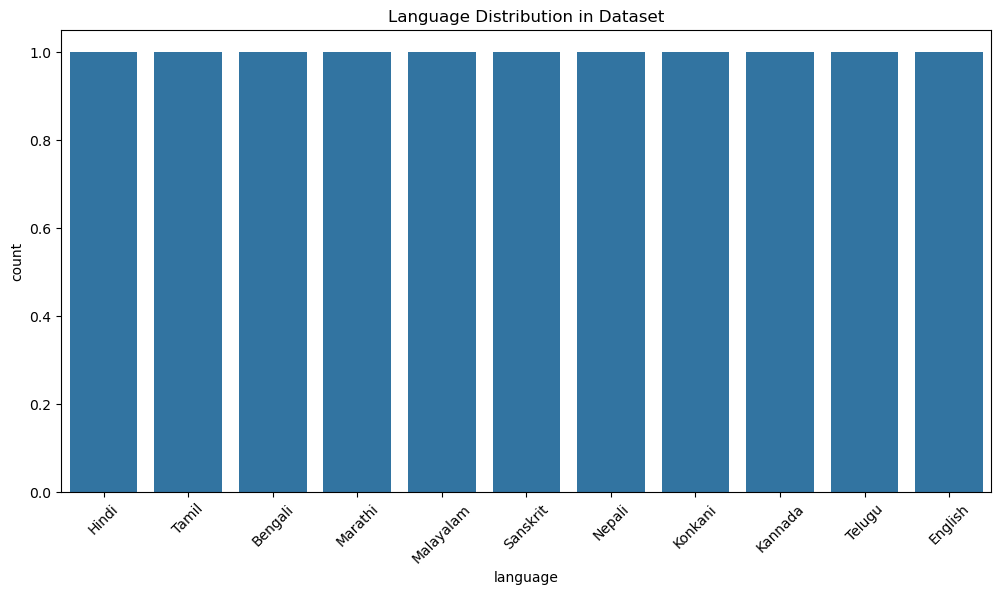

In [7]:
# Analyze data distribution
plt.figure(figsize=(12,6))
sns.countplot(x='language', data=df)
plt.title('Language Distribution in Dataset')
plt.xticks(rotation=45)
plt.show()

In [8]:
# Feature Extraction - Traditional ML
tfidf_vectorizer = TfidfVectorizer(ngram_range=(1,3), max_features=5000)
X_tfidf = tfidf_vectorizer.fit_transform(df['cleaned_text'])
y = df['language']

In [10]:
from sklearn.model_selection import train_test_split

# Split dataset without stratification
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y, test_size=0.2, random_state=42)


In [ ]:
# Traditional ML Model (Updated with Error Handling and Alternatives)
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import make_pipeline
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import MultinomialNB


# Ensure labels are properly encoded
le = LabelEncoder()
y_encoded = le.fit_transform(y)
X_train, X_test, y_train, y_test = train_test_split(
    X_tfidf, y_encoded, test_size=0.2, stratify=y, random_state=42)

# Verify data shapes
print("Training data shape:", X_train.shape)
print("Test data shape:", X_test.shape)
print("Class distribution:", np.bincount(y_train))

# Approach 1: Random Forest with Class Weight Balancing
rf = RandomForestClassifier(class_weight='balanced', n_jobs=-1, random_state=42)
rf_params = {
    'n_estimators': [100, 200],
    'max_depth': [None, 50]
}

rf_grid = GridSearchCV(rf, rf_params, cv=3, scoring='accuracy')
rf_grid.fit(X_train, y_train)

print("Best Random Forest Parameters:", rf_grid.best_params_)
best_rf = rf_grid.best_estimator_
y_pred_rf = best_rf.predict(X_test)

print("Random Forest Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=le.classes_))

ValueError: The least populated class in y has only 1 member, which is too few. The minimum number of groups for any class cannot be less than 2.